In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
from scipy import stats
from scipy.optimize import minimize_scalar
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [3]:
from google.colab import files
files.upload()

Saving vgames2.csv to vgames2 (1).csv


{'vgames2.csv': b'"","Name","Platform","Year","Genre","Publisher","NA_Sales","EU_Sales","JP_Sales","Other_Sales"\n"1","Candace Kane\'s Candy Factory","DS","2008","Action","Destineer","0.04","0","0","0"\n"2","The Munchables","Wii","2009","Action","Namco Bandai Games","0.17","0","0","0.01"\n"3","Otome wa Oanesama Boku ni Koi Shiteru Portable","PSP","2010","Adventure","Alchemist","0","0","0.02","0"\n"4","Deal or No Deal: Special Edition","DS","2010","Misc","Zoo Games","0.04","0","0","0"\n"5","Ben 10 Ultimate Alien: Cosmic Destruction","PS3","2010","Platform","D3Publisher","0.12","0.09","0","0.04"\n"6","Power Pro Kun Pocket 8","DS","2005","Sports","Konami Digital Entertainment","0","0","0.14","0"\n"7","JASF: Jane\'s Advanced Strike Fighters","PC","2011","Simulation","Deep Silver","0.02","0.01","0","0"\n"8","Samurai Warriors: State of War","PSP","2005","Action","Tecmo Koei","0.07","0","0.11","0.01"\n"9","Imabikisou","PS3","2007","Adventure","Sega","0","0","0.04","0"\n"10","The Penguins of M

In [4]:
df= pd.read_csv('vgames2.csv')
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [5]:
df.isna().any(axis=1)

0        False
1        False
2        False
3        False
4        False
         ...  
16593    False
16594    False
16595    False
16596    False
16597    False
Length: 16598, dtype: bool

In [6]:
df.isna().sum()

Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [7]:
df.dropna(axis=0, inplace = True)

In [8]:
df.duplicated().sum()

0

In [9]:
#df 데이터프레임에서 지역별 판매 데이터를 포함한 칼럼을 추출
na_df = df.loc[:, ['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales']]
eu_df = df.loc[:, ['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'EU_Sales']]
jp_df = df.loc[:, ['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'JP_Sales']]
other_df = df.loc[:, ['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'Other_Sales']]

print(na_df.head())
print(eu_df.head())
print(jp_df.head())
print(other_df.head())

                                             Name Platform    Year      Genre  \
0                    Candace Kane's Candy Factory       DS  2008.0     Action   
1                                  The Munchables      Wii  2009.0     Action   
2  Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP  2010.0  Adventure   
3                Deal or No Deal: Special Edition       DS  2010.0       Misc   
4       Ben 10 Ultimate Alien: Cosmic Destruction      PS3  2010.0   Platform   

            Publisher NA_Sales  
0           Destineer     0.04  
1  Namco Bandai Games     0.17  
2           Alchemist        0  
3           Zoo Games     0.04  
4         D3Publisher     0.12  
                                             Name Platform    Year      Genre  \
0                    Candace Kane's Candy Factory       DS  2008.0     Action   
1                                  The Munchables      Wii  2009.0     Action   
2  Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP  2010.0  Adve

In [10]:
# Remove the units of measurement and convert to floats
df['NA_Sales'] = df['NA_Sales'].str.replace('K', '000').str.replace('M', '000000').astype(float)
df['EU_Sales'] = df['EU_Sales'].str.replace('K', '000').str.replace('M', '000000').astype(float)
df['JP_Sales'] = df['JP_Sales'].str.replace('K', '000').str.replace('M', '000000').astype(float)
df['Other_Sales'] = df['Other_Sales'].str.replace('K', '000').str.replace('M', '000000').astype(float)

In [12]:
# 장르별로 데이터를 그룹화하고 각 지역의 판매 합계를 계산합니다.
region_sales = df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# 정렬 장르별 지역별 매출 내림차순
region_sales = region_sales.sort_values(by=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], ascending=False)

# 지역별 장르별 매출 출력
print("Sales by Genre and Region\n")
print(region_sales)

Sales by Genre and Region

                NA_Sales    EU_Sales    JP_Sales  Other_Sales
Genre                                                        
Action        7030851.72  4220509.42  1170155.43    910183.08
Racing        5490349.21   630234.39   260056.06    340076.17
Misc          3760390.97  2140206.01   230103.95    130072.51
Platform      3310442.07  1290199.34   210130.32    340051.11
Sports        3000664.26   730370.24   230134.53    470131.88
Simulation    2870178.56  1100111.89  1250062.29     70031.25
Shooter       2650571.83  3340306.89    40038.14    340101.52
Role-Playing  1210317.55    30183.06  3830339.10    730056.00
Strategy       820067.01    80044.74   160048.94    220011.01
Fighting       810219.54  1390098.51   180086.96    140036.01
Adventure      270101.52   140063.52    60051.81     80016.62
Puzzle          70121.51    50050.42       56.24        12.44


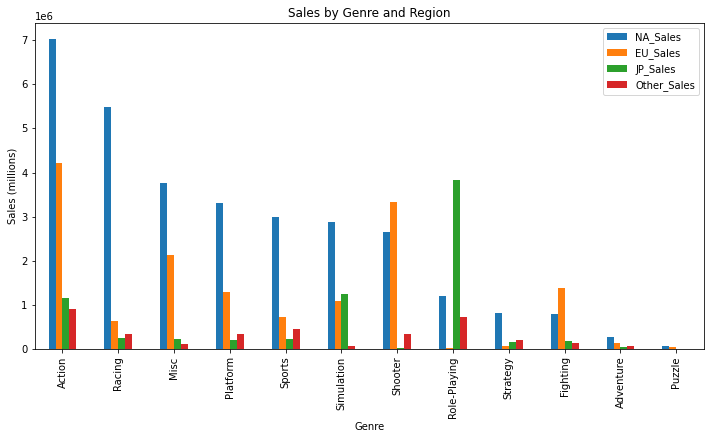

In [13]:
# Plot the sales for each region by genre
region_sales.plot(kind='bar', figsize=(12, 6))
plt.title('Sales by Genre and Region')
plt.xlabel('Genre')
plt.ylabel('Sales (millions)')
plt.show()

북미는 Action, Racing, Misc. 유럽은 Action, Shooter, Misc. 일본은 Role-Playing, Simulation, Action. 그 외 지역은 Action, Role-Playing,Shooter 순입니다.

북미,유럽,그 외 지역은 Action 장르를 제일 좋아하지만 일본은 Role-Playing 을 제일 좋아합니다.

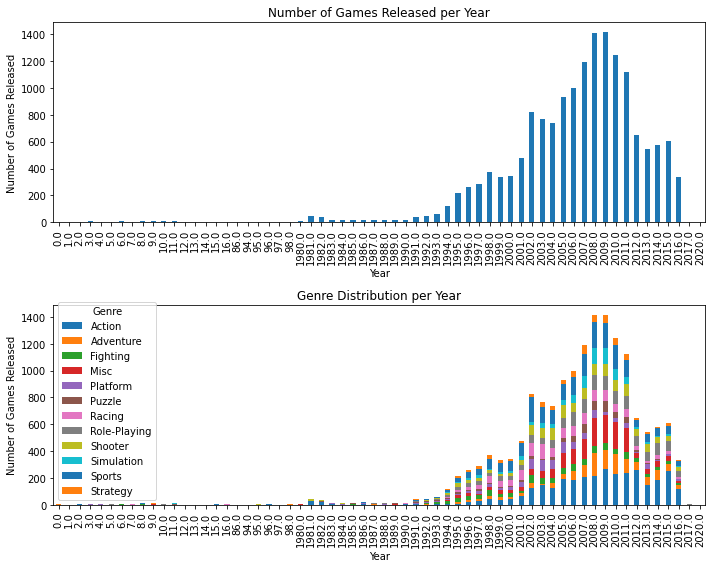

In [14]:
# 각 연도별 게임 수 및 장르 분포 파악
year_counts = df['Year'].value_counts().sort_index()
genre_counts = df.groupby('Year')['Genre'].value_counts().unstack().fillna(0)

# 시각화
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
year_counts.plot(ax=ax[0], kind='bar')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Games Released')
ax[0].set_title('Number of Games Released per Year')
genre_counts.plot(ax=ax[1], kind='bar', stacked=True)
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Number of Games Released')
ax[1].set_title('Genre Distribution per Year')
plt.tight_layout()
plt.show()

2000년대 중반부터 슈팅, 액션, 스포츠, 롤플레잉 등이 가장 많이 출시되었으며, 특히 2010년대 이후로는 액션과 슈팅 게임의 비중이 더욱 높아졌음을 알 수 있습니다. 또한 2000년대 초반까지는 PC와 플레이스테이션 2가 가장 많이 사용되었으나, 2010년대 이후로는 XBox 360, PS3, PS4 등이 대세가 되었습니다.

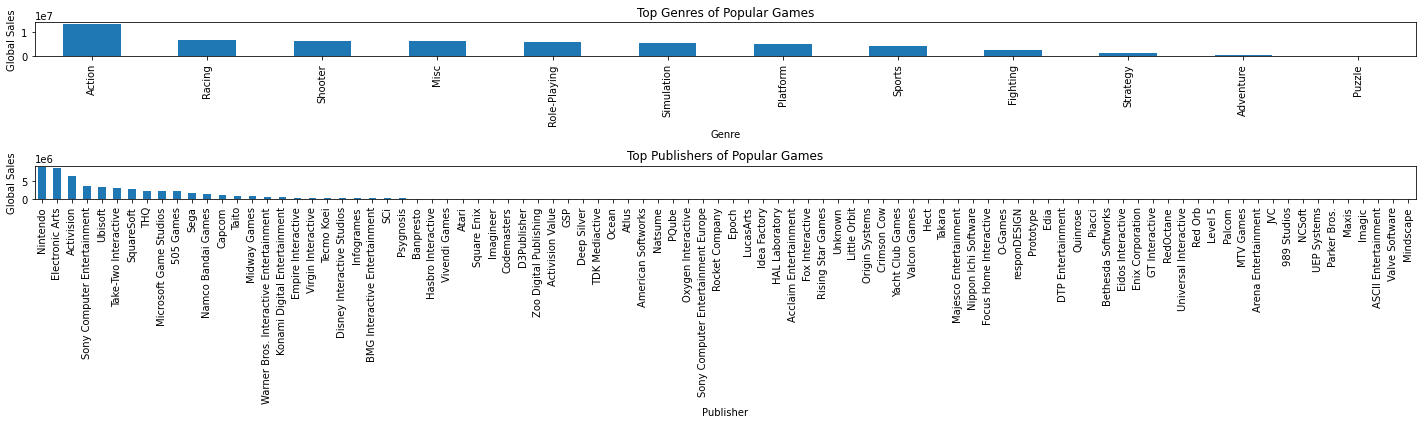

In [17]:
# Global_Sales와 Total_Sales 생성
df['Global_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
df['Total_Sales'] = df['Global_Sales'] * 1000000  # 단위를 백만 달러로 변환 (1회 출고량 = 1백만 달러)

# Year 열의 데이터 타입을 정수형으로 변환
df['Year'] = df['Year'].astype(int)

# 전체 출고량이 높은 게임의 특징 파악
top_games = df.sort_values(by='Global_Sales', ascending=False).head(1000)
top_genres = top_games.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
top_publishers = top_games.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False)

# 시각화
fig, ax = plt.subplots(2, 1, figsize=(20, 6))
top_genres.plot(ax=ax[0], kind='bar')
ax[0].set_xlabel('Genre')
ax[0].set_ylabel('Global Sales')
ax[0].set_title('Top Genres of Popular Games')
top_publishers.plot(ax=ax[1], kind='bar')
ax[1].set_xlabel('Publisher')
ax[1].set_ylabel('Global Sales')
ax[1].set_title('Top Publishers of Popular Games')
plt.tight_layout()
plt.show()

전체 출고량이 높은 상위 1000개의 게임에서 가장 많이 출시된 장르와 가장 많은 출고량을 기록한 배급사를 시각화할 수 있습니다. 이를 통해 액션과 슈팅 장르의 인기가 높으며, Electronic Arts, Activision, Nintendo, Sony Computer Entertainment, Ubisoft 등이 인기 있는 배급사임을 알 수 있습니다.

다음 분기에 어떤 게임을 설계해야 하는지에 대한 결론은 Acion 게임을 설계하고 Nintendo, Electronic Arts, Activision을 노려야 한다고 생각합니다.